<a href="https://colab.research.google.com/github/Neelkamal18/Neel/blob/master/Copy_of_UKF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install filterpy

In [0]:
#function defining state transition
def A_ball(x,dt):
  A = np.eye(7)+np.matrix([[0,dt,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,dt,0,0,0],[0,0,0,0,dt,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,dt],[0,0,0,0,0,0,0]])
  return np.dot(A,x)

In [0]:
#function defining output model
def h_camera(x,f=1017.036,R=3.335):
  u = 617-(f*x[0]/x[5])
  v = 360-(f*(x[2]+(x[5]/20)-18*2.54)/x[5])
  r = f*R/x[5]
  return [u,v,r]


In [0]:
import csv
rdx = csv.reader(open("xlist_csv.csv", "r"), delimiter=",")
x = []
for row in rdx:
  x.append(float(row[0]))

rdy = csv.reader(open("ylist_csv.csv", "r"), delimiter=",")
y = []
for row in rdy:
  y.append(float(row[0]))

rdr = csv.reader(open("rlist_csv.csv", "r"), delimiter=",")
r = []
for row in rdr:
  r.append(float(row[0]))

ini = 30
fin = 74

zs = [[x[i],y[i],r[i]] for i in range(ini,fin)]

rdxw = csv.reader(open("XWlist_csv.csv", "r"), delimiter=",")
xw = []
for row in rdxw:
  xw.append(float(row[0]))

rdyw = csv.reader(open("YWlist_csv.csv", "r"), delimiter=",")
yw = []
for row in rdyw:
  yw.append(float(row[0]))

rdzw = csv.reader(open("ZWlist_csv.csv", "r"), delimiter=",")
zw = []
for row in rdzw:
  zw.append(float(row[0]))

#rdti = csv.reader(open("tlist_csv.csv", "r"), delimiter=",")
#ti = []
#for row in rdti:
#  ti.append(float(row[0]))

#diff = [(ti[i+1]-ti[i]) for i in range(len(ti)-1)]
dt = 4/74
x0 = [xw[ini],(xw[ini+5]-xw[ini])/(dt*5),yw[ini],(yw[ini+5]-yw[ini])/(dt*5),-979.343,zw[ini],(zw[ini+1]-zw[ini])/(dt)]




[69.89206881168421,
 -90.88313412933113,
 48.48844119178915,
 76.59313755858683,
 -979.343,
 397.0582112269523,
 0.0]

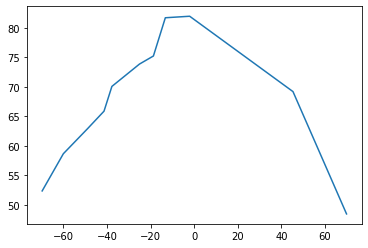

In [24]:
plt.plot(xw[ini:fin],yw[ini:fin])


x0

396.4403152751869

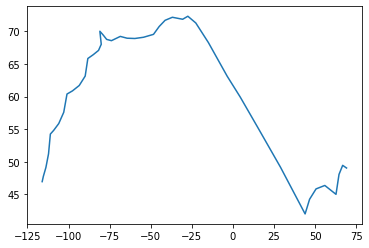

In [25]:
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt
import numpy as np

dt = 4/74

sigmas = MerweScaledSigmaPoints(7, alpha=.1, beta=2., kappa=4.)
ukf = UKF(dim_x=7, dim_z=3, fx=A_ball,
          hx=h_camera, dt=dt, points=sigmas)
ukf.x = np.array(x0)
ukf.R = np.diag([1, 1,0.1]) 
ukf.Q[0:2, 0:2] = Q_discrete_white_noise(2, dt=dt, var=0.02)
ukf.Q[2:5, 2:5] = Q_discrete_white_noise(3, dt=dt, var=0.02)
ukf.Q[5:7, 5:7] = Q_discrete_white_noise(2, dt=dt, var=0.02)

uxs = []
for z in zs:
    ukf.predict()
    ukf.update(z)
    uxs.append(ukf.x.copy())
uxs = np.array(uxs)

plt.plot(uxs[:, 0],uxs[:, 2])
uxs[0,5]


In [0]:
## Observability

A = np.eye(7)+np.matrix([[0,dt,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,dt,0,0,0],[0,0,0,0,dt,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,dt],[0,0,0,0,0,0,0]])
C = np.matrix([[1,0,0,0,0,-5,0],[0,0,1,0,0,-5,0],[0,0,0,0,0,-10,0]])
O = np.vstack((C,np.dot(C,A),np.dot(C,A**2),np.dot(C,A**3),np.dot(C,A**4),np.dot(C,A**5),np.dot(C,A**6)))
O_rank = np.linalg.matrix_rank(O)
O_rank

In [0]:
#Checking functions
print(A_ball([1,0,1,1,-9,1,0],0.01))
print(h_camera([10,0,10,1,-9,1000,0],1000,33.35*(10**-3)))